# Homework 7b: Classes and Structured Data Files

### Problem 1

#### Part a

* The homework includes a file ```units.py```. The file should be copied into the same folder as your HW7b.ipynb file that you are working on (this file).
* Show the contents of that file in your notebook by typing ```%load units.py``` in a cell and running it.

In [94]:
# %load units.py
"""
Simple unit conversion module.
Some basic conversions for length and temperature.
"""

ft_to_m = 0.3048
m_to_ft = 3.28084

ft_to_in = 12.0
in_to_ft = 1.0/12.0
mi_to_ft = 5280.0
ft_to_mi = 1.0/5280.0
in_to_mi = 1.0/12.0/5280.0
mi_to_in = 5280.0*12.0

m_to_km  = 0.001
m_to_dm  = 10.0
m_to_cm  = 100.0
m_to_mm  = 1000.0
m_to_um  = 1.0E6  # m to micrometers

def K_to_C(T_K) :
    return T_K - 273.2

def C_to_K(T_C) :
    return T_C + 273.2

def F_to_C(T_F) :
    return (T_F - 32.0)/1.8

def C_to_F(T_C) :
    return T_C*1.8 + 32.0

#### Part b

* Extend the ```units.py``` module in a new ```ext_units.py``` file with the leading line ```from units import *```
* Add functions to convert from F to R and R to F.
* Correct the conversions from C to K and from K to C by overriding those functions.
* Test the conversion functions by computing the freezing point of water at $T_{f} = 0^o \; C$ in F, K, and R.

In [95]:
import ext_units as uts

TC = 0
TF = uts.C_to_F(TC)
TK = uts.C_to_K(TC)
TR = uts.F_to_R(TF)

print(TF, 'F')
print(TK, 'K')
print(TR, 'R')

32.0 F
273.15 K
491.67 R


#### Part c

* Import the ```ext_units.py``` module and use it in the function you write below.
* Define a function that returns the ideal gas pressure given temperature with n=1 mole and V=1 m^3. 
    * The function should look like this: ```def P_ig(T, Tu) : ```, 
    * where, T is the Temperature and Tu is the units of Temperature.
* Hint: Convert all input units to K, then compute pressure (in Pa).
* Test the function by computing the pressures at temperatures of $0^o \; C$, $32^o \; F$, and $491.67 \; R$.  

In [96]:
def P_ig(T,Tu):
    Tu = Tu.upper()
    if Tu=='C':
        T = uts.C_to_K(T)
    elif Tu=='R':
        T = uts.R_to_F(T)
        T = uts.F_to_C(T)
        T = uts.C_to_K(T)
    elif Tu=='F':
        T = uts.F_to_C(T)
        T = uts.C_to_K(T)
    elif Tu=='K':
        T = T
    else:
        print('invalid temperature units')
        return 0
    
    n = 1
    V = 1
    R = 8.314
    P = n * R * T  / V
    return P

print(P_ig(0,'C'))
print(P_ig(32, 'F'))
print(P_ig(491.67, 'R'))

2270.9691
2270.9691
2270.9691


### Problem 2

Retrieve ```thermo.yaml``` with the following command.

In [97]:
# import or install wget
try:
    import wget
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','wget'])
    import wget

url = 'https://apmonitor.com/che263/uploads/Main/thermoData.yaml'
filename = wget.download(url)
print('')
print('Retrieved thermoData.yaml')


Retrieved thermoData.yaml


#### Part a
* Write a class for computing thermodynamic properties in a cell below.
* Call the class "thermo"
* Include an ```__init__(self, species)``` function that sets the gas constant Rgas = 8314.46 J/kmol*K.
    * Use kmol instead of gmol because kg is the SI unit of mass, not gm.
    * The __init__ function should open the file thermoData.yaml included with the homework. Use this code to open the file:   
    
    
    import yaml
    with open("thermoData.yaml") as yfile :          
       yfile = yaml.load(yfile, Loader=yaml.FullLoader)


* Also in ```__init__``` Make two arrays that are members of the class called a_lo, and a_hi.
* Get these arrays from the yaml file using something like ```a_lo = yfile[species]["a_lo"]```, where "species" is the string passed as an argument to __init__. When you create an instance of the class, you should give a string argument that is one of the species in the HW13P2.yaml file.
* The two arrays work in two separate temperature ranges: a_lo is for $300<T<1000$ K and a_hi is for $1000<T<3000$ K.


In [98]:
import yaml
with open("thermoData.yaml") as yfile :          
   yfile = yaml.load(yfile, Loader=yaml.FullLoader)

#### Part b
* Write thermo class functions: get_cp that computes the heat capacity in J/kmol*K. The functions should take temperature in Kelvin as an argument.
* Make sure you use the right set of coefficients for the right temperature range.
* The equation is given by: 
$$ \frac{c_p}{R_g} = a_0 + a_1T+a_2T^2 + a_3T^3+a_4T^4 $$


In [99]:
class thermo:
    def __init__(self, species):
        import yaml
        with open('thermoData.yaml') as yfile:
            yfile = yaml.load(yfile)
        self.a_lo = yfile[species]['a_lo']
        self.a_hi = yfile[species]['a_hi']
        self.Rg = 8314.46
            
    def get_cp(self,T):
        
        if T<1000:
            a = self.a_lo
        else:
            a = self.a_hi
        Rg = self.Rg
            
        cp = Rg * (a[0] + a[1] * T + a[2] * T**2 + a[3]*T**3 + a[4]*T**4)
        return cp

#### Part c
* Instantiate the class for species CH4. Call the object ```t_CH4```
    * Like this: ```t_CH4 = thermo("CH4")```
* Make a plot for cp versus temperature. Let temperature vary from 300 K to 3000 K. Use at least 100 points.

* Hints:
    * Make an array of temperatures and heat capacities (cp)
    * Write a loop over the number of points: ```for iT in range(npts) :```
    * In the loop call the functions with something like: ```cp[iT] = t_CH4.get_cp(T[iT])```


In [100]:
import numpy as np

T = np.linspace(300,3000,200)
cp1 = np.ones(len(T))
cp2 = np.ones(len(T))

t_CH4 = thermo("CH4")
t_O2 = thermo("O2")

for iT in range(len(T)):
    cp1[iT] =  t_CH4.get_cp(T[iT])
    cp2[iT] = t_O2.get_cp(T[iT])




C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


Text(0.5, 1.0, 'Heat Capacity')

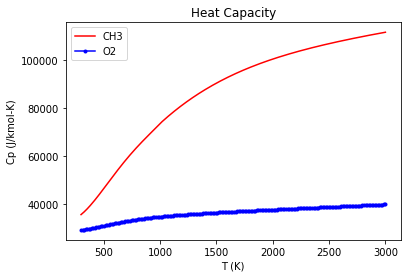

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(T,cp1,'r-')
plt.plot(T,cp2,'b.-')

plt.legend(['CH3','O2'])
plt.xlabel('T (K)')
plt.ylabel('Cp (J/kmol-K)')
plt.title('Heat Capacity')